In [1]:
import numpy as np
import matplotlib.pyplot as plt

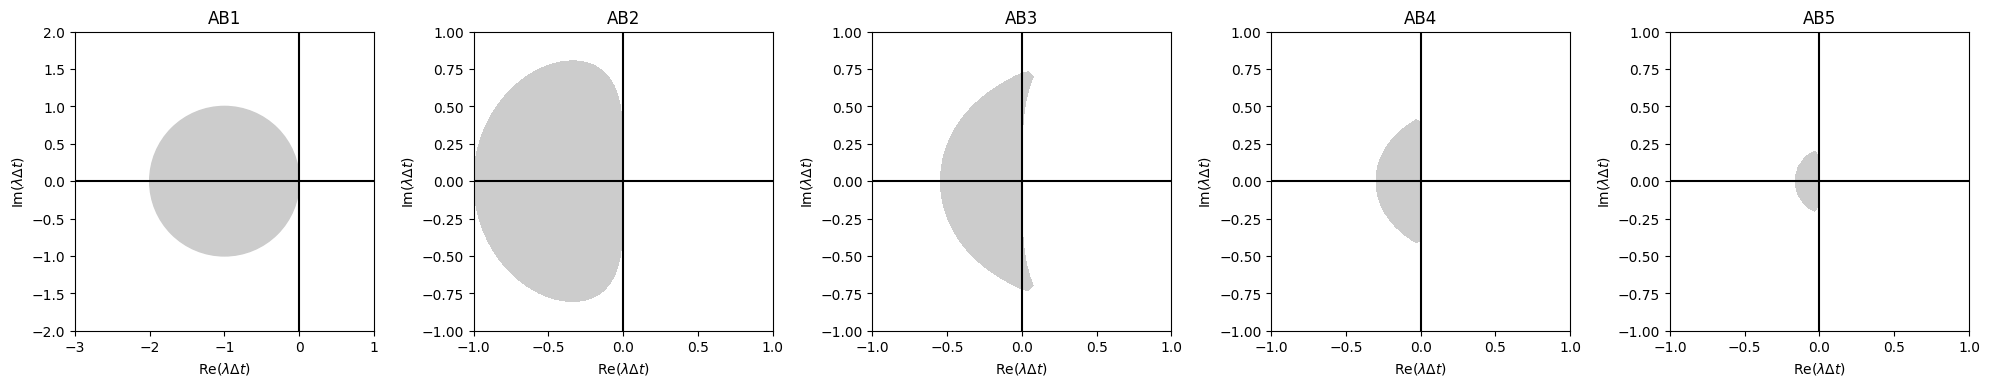

In [4]:
### Adapted from
# https://commons.wikimedia.org/wiki/File:Stability_region_for_BDF1.svg

plotWindow = {'realPart': [-2, 5], 'imagPart': [-3, 3]}

# Returns > 1 if argument is not in region of absolute stability
def AB2_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 3/2*dtLambda,
                      1/2 * dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB3_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 23/12*dtLambda,
                      16/12*dtLambda, -5/12*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB4_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 55/24*dtLambda,
                      59/24*dtLambda, -37/24*dtLambda, 9/24*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB5_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 1901/720*dtLambda,
                      2774/720*dtLambda, -2616/720*dtLambda,
                      1274/720*dtLambda, -251/720*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))



# AB3
x = np.linspace(*plotWindow['realPart'], num=200)
y = np.linspace(*plotWindow['imagPart'], num=100)
[X, Y] = np.meshgrid(x, y)

Z_AB2 = np.zeros(X.shape)
Z_AB3 = np.zeros(X.shape)
Z_AB4 = np.zeros(X.shape)
Z_AB5 = np.zeros(X.shape)


for m in range(X.shape[0]):
    for n in range(X.shape[1]):
        Z_AB2[m, n] = AB2_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB3[m, n] = AB3_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB4[m, n] = AB4_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB5[m, n] = AB5_stabilityFunction(X[m, n] + 1j * Y[m, n])

fig, axs = plt.subplots(1, 5, figsize=(20, 12))
shading = '0.8'

for ax in axs.reshape(-1):
    ax.set_aspect('equal')
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_xlabel(r'Re($\lambda\Delta t$)')
    ax.set_ylabel(r'Im($\lambda\Delta t$)')

ax = axs[0]
ax.axis([-3, 1, -2, 2])
ax.set_title('AB1')
ax.add_patch(plt.Circle((-1, 0), 1, color=shading))


ax = axs[1]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB2')
ax.contourf(X, Y, Z_AB2, [0, 1], colors=shading)


ax = axs[2]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB3')
ax.contourf(X, Y, Z_AB3, [0, 1], colors=shading)

ax = axs[3]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB4')
ax.contourf(X, Y, Z_AB4, [0, 1], colors=shading)

ax = axs[4]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB5')
ax.contourf(X, Y, Z_AB5, [0, 1], colors=shading)


fig.tight_layout()
plt.savefig('ABstab.png', dpi=800, bbox_inches='tight')
plt.show()